# Activity: Build a Naive Bayes model 

## Introduction

In this activity, you will build your own Naive Bayes model. Naive Bayes models can be valuable to use any time you are doing work with predictions because they give you a way to account for new information. In today's world, where data is constantly evolving, modeling with Naive Bayes can help you adapt quickly and make more accurate predictions about what could occur.

For this activity, you work for a firm that provides insights for management and coaches in the National Basketball Association (NBA), a professional basketball league in North America. The league is interested in retaining players who can last in the high-pressure environment of professional basketball and help the team be successful over time. In the previous activity, you analyzed a subset of data that contained information about the NBA players and their performance records. You conducted feature engineering to determine which features would most effectively predict a player's career duration. You will now use those insights to build a model that predicts whether a player will have an NBA career lasting five years or more. 

The data for this activity consists of performance statistics from each player's rookie year. There are 1,341 observations, and each observation in the data represents a different player in the NBA. Your target variable is a Boolean value that indicates whether a given player will last in the league for five years. Since you previously performed feature engineering on this data, it is now ready for modeling.   

## Step 1: Imports

### Import packages

Begin with your import statements. Of particular note here are `pandas` and from `sklearn`, `naive_bayes`, `model_selection`, and `metrics`.

In [136]:
# Import relevant libraries and modules.
import numpy as np
import pandas as pd
import sklearn
import scipy.stats as stast
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt

### Load the dataset

Recall that in the lab about feature engineering, you outputted features for the NBA player dataset along with the target variable ``target_5yrs``. Data was imported as a DataFrame called `extracted_data`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [137]:
# RUN THIS CELL TO IMPORT YOUR DATA.
# Load extracted_nba_players_data.csv into a DataFrame called extracted_data.

extracted_data = pd.read_csv('extracted_nba_players_data.csv')

### Display the data

Review the first 10 rows of data.

In [138]:
# Display the first 10 rows of data.

### YOUR CODE HERE ###

extracted_data.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,0.324561
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,0.553398
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,0.242424
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,0.435294


## Step 2: Model preparation

### Isolate your target and predictor variables
Separately define the target variable (`target_5yrs`) and the features.

In [139]:
# Define the y (target) variable.

### YOUR CODE HERE ###
y=extracted_data['target_5yrs']

# Define the X (predictor) variables.

### YOUR CODE HERE ###
X=extracted_data.drop('target_5yrs',axis=1)

for i in X.columns:
    X[X[i]==0.0]=1.0
    


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data into X and y](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/VxbUT/construct-a-naive-bayes-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

In `pandas`, subset your DataFrame by using square brackets `[]` to specify which column(s) to select.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Quickly subset a DataFrame to exclude a particular column by using the `drop()` function and specifying the column to drop.
</details>

### Display the first 10 rows of your target data

Display the first 10 rows of your target and predictor variables. This will help you get a sense of how the data is structured.

In [140]:
# Display the first 10 rows of your target data.

### YOUR CODE HERE ###
X.head(10)


,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,0.491379
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,273.6,0.553398
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000


**Question:** What do you observe about the your target variable?


There is a class imbalance but  more than 20 % of the values are present in both the labels. so the class imbalance is not severe


In [141]:
# Display the first 10 rows of your predictor variables.

### YOUR CODE HERE ###
y.value_counts()

1    831
0    509
Name: target_5yrs, dtype: int64

**Question:** What do you observe about the your predictor variables?

[Write your response here. Double-click (or enter) to edit.]

### Perform a split operation on your data

Divide your data into a training set (75% of data) and test set (25% of data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not observed. This tests how well the model generalizes—or performs—on new data.

In [142]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.

### YOUR CODE HERE ###

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=5646,test_size=0.4,stratify=y)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data between a training and test set](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/VxbUT/construct-a-naive-bayes-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call the function in the `model_selection` module of `sklearn` on the features and target variable, in order to perform the splitting.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `model_selection.train_test_split()` function, passing in both `features` and `target`, while configuring the appropriate `test_size`.

Assign the output of this split as `X_train`, `X_test`, `y_train`, `y_test`.
</details>

### Print the shape of each output 

Print the shape of each output from your train-test split. This will verify that the split operated as expected.

In [143]:
# Print the shape (rows, columns) of the output from the train-test split.

# Print the shape of X_train.

### YOUR CODE HERE ###

X_train.shape

# Print the shape of X_test.

### YOUR CODE HERE ###

X_test.shape


# Print the shape of y_train.

### YOUR CODE HERE ###

y_train.shape

# Print the shape of y_test.

### YOUR CODE HERE ###
y_test.shape


(536,)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Call the attribute that DataFrames in `pandas` have to get the number of rows and number of columns as a tuple.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call the `shape` attribute.
</details>

**Question:** How many rows are in each of the outputs?


[Write your response here. Double-click (or enter) to edit.]

**Question:** What was the effect of the train-test split?


[Write your response here. Double-click (or enter) to edit.]

## Step 3: Model building

**Question:** Which Naive Bayes algorithm should you use?

GaussiaNB because most of the values are continiuous variables in all the features

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about different implementations of the Naive Bayes](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/supplement/1zfDy/naive-bayes-classifiers) to determine which is appropriate in this situation.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Note that you are performing binary classification.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

You can identify the appropriate algorithm to use because you are performing a binary classification and assuming that the features of your model follow a normal distribution.
</details>

### Fit your model to your training data and predict on your test data

By creating your model, you will be drawing on your feature engineering work by training the classifier on the `X_train` DataFrame. You will use this to predict `target_5yrs` from `y_train`.

Start by defining `nb` to be the relevant algorithm from `sklearn`.`naive_bayes`. Then fit your model to your training data. Use this fitted model to create predictions for your test data.

In [144]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.

### YOUR CODE HERE ###
model=GaussianNB()


# Fit the model on your training data.

### YOUR CODE HERE ###
model.fit(X_train,y_train)


# Apply your model to predict on your test data. Call this "y_pred".

### YOUR CODE HERE ###

y_test=np.array(y_test)
y_test=y_test.reshape(-1,1)

y_pred=model.predict(X_test)



<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a Naive Bayes](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/VxbUT/construct-a-naive-bayes-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The appropriate implementation in this case is `naive_bayes`.`GaussianNB()`. Fit this model to your training data and predict on your test data.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `fit()`and pass your training feature set and target variable. Then call `predict()` on your test feature set.
</details>

## Step 4: Results and evaluation


### Leverage metrics to evaluate your model's performance

To evaluate the data yielded from your model, you can leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [146]:
# Print your accuracy score.

### YOUR CODE HERE ###



y_pred=y_pred.reshape(-1,1)


accuracy_score(y_test,y_pred)

# Print your precision score.

### YOUR CODE HERE ###
precision_score1=precision_score(y_test,y_pred)


# Print your recall score.

### YOUR CODE HERE ###

recall_score1=recall_score(y_test,y_pred)


# Print your f1 score.

### YOUR CODE HERE ###

f1_score1=f1_score(y_test,y_pred)

In [150]:
print(precision_score1)

0.7876712328767124


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/EITmV/key-evaluation-metrics-for-classification-models) for detail on these metrics.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `metrics` module in `sklearn` has a function for computing each of these metrics.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()`, passing `y_test`, and `y_pred` into each function.
</details>

**Question:** What is the accuracy score for your model, and what does this tell you about the success of the model's performance?



[Write your response here. Double-click (or enter) to edit.]

**Question:** Can you evaluate the success of your model by using the accuracy score exclusively?


[Write your response here. Double-click (or enter) to edit.]

**Question:** What are the precision and recall scores for your model, and what do they mean? Is one of these scores more accurate than the other?


[Write your response here. Double-click (or enter) to edit.]

**Question:** What is the F1 score of your model, and what does this score mean?

[Write your response here. Double-click (or enter) to edit.]

### Gain clarity with the confusion matrix

Recall that a confusion matrix is a graphic that shows your model's true and false positives and negatives. It helps to create a visual representation of the components feeding into the metrics.

Create a confusion matrix based on your predicted values for the test set.

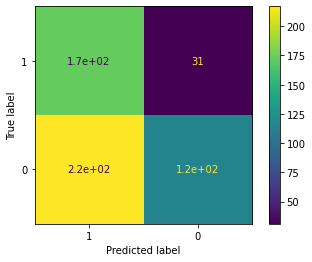

In [147]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.

### YOUR CODE HERE ###


from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

# Create the display for your confusion matrix.

### YOUR CODE HERE ###
cm=confusion_matrix(y_test,y_pred)


dis=ConfusionMatrixDisplay(cm,display_labels=['1','0'])
dis.plot()
plt.show()
# Plot the visual in-line.

### YOUR CODE HERE ###



<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

The `metrics` module has functions to create a confusion matrix.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call `confusion_matrix`, passing in `y_test` and `y_pred`. Then, utilize `ConfusionMatrixDisplay()` to display your confusion matrix.
</details>

**Question:** What do you notice when observing your confusion matrix, and does this correlate to any of your other calculations?


From the confusion matrix, the model is predicting most values as False negatives. Most of the NBA stars have their careers less than 5 years but model is predicting as more than 5 years which is less problematic compared to predicting NBA stars having 
their careers less than 5 years but in actuality more than 5 years. 

## Considerations

**What are some key takeaways that you learned from this lab?**

[Write your response here. Double-click (or enter) to edit.]


**How would you present your results to your team?**

[Write your response here. Double-click (or enter) to edit.]


**How would you summarize your findings to stakeholders?**

[Write your response here. Double-click (or enter) to edit.]



**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged